# SALES PREDICTION USING PYTHON

## Dataset

The dataset is downloaded from kaggle.

URL - https://www.kaggle.com/datasets/bumba5341/advertisingcsv/data

## Features of the dataset

TV <br>
Radio <br>
Newspaper <br>
Sales (Target)

## Objective

Our objective is to take the available features like TV advertising, Radio advertising and Newspaper advertising and train a Machine learning model which can predict the sales.

## Evaluation Metric

For prediction we generally use regression models. The possible evaluation metrics are Mean Squared Error (MSE), Root Mean Squared Error (RMSE) and Mean Absolute Error (MAE).

In [11]:
# importing EDA and plotting libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#modelling libraries
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split

#evaluation metrics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [12]:
# Loading the dataset from PC
df = pd.read_csv("C:\\Users\\kenka\\OneDrive\\Desktop\\OASIS\\advertising.csv", index_col=0)

In [13]:
df.head()

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [14]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [15]:
df.axes

[Index([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,
        ...
        191, 192, 193, 194, 195, 196, 197, 198, 199, 200],
       dtype='int64', length=200),
 Index(['TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')]

In [10]:
df.dtypes

TV           float64
Radio        float64
Newspaper    float64
Sales        float64
dtype: object

In [16]:
df.shape

(200, 4)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 200 entries, 1 to 200
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 7.8 KB


In [19]:
df.duplicated().sum()

0

In [45]:
df.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

### No null values and duplicates are present.

## Exploratory Data Analysis

C:\Users\kenka\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


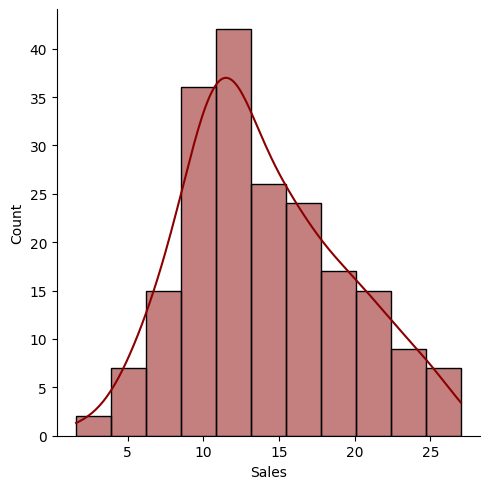

In [24]:
# Distribution of Target variable.
sns.displot(data=df, x="Sales", kde=True, color="darkred")
plt.show()

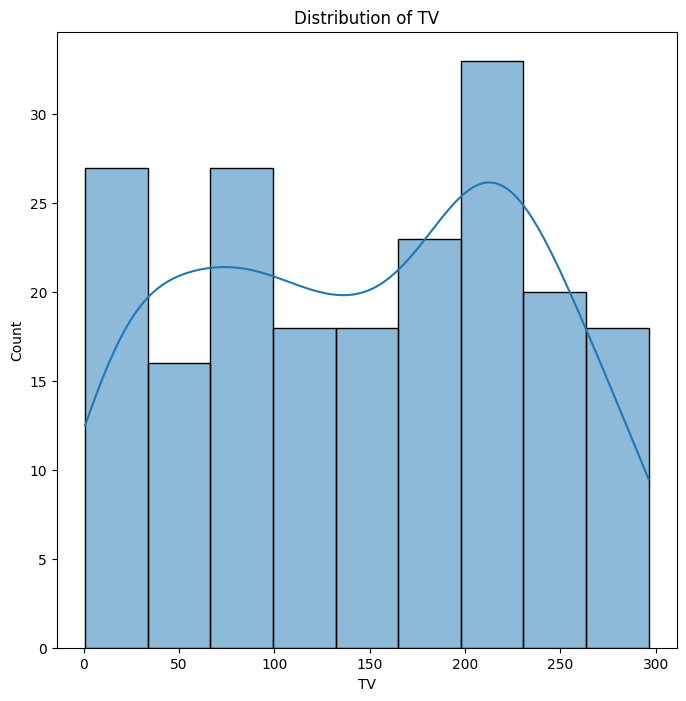

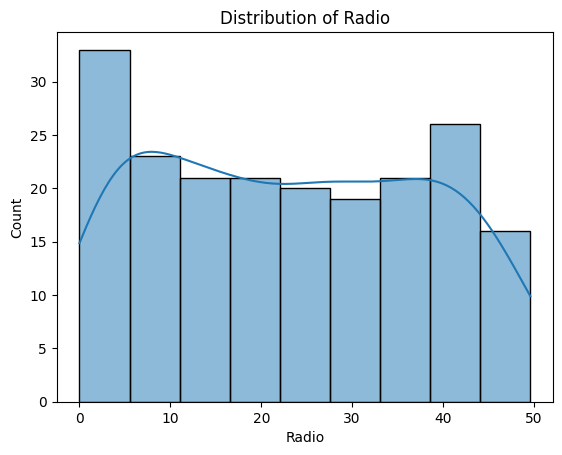

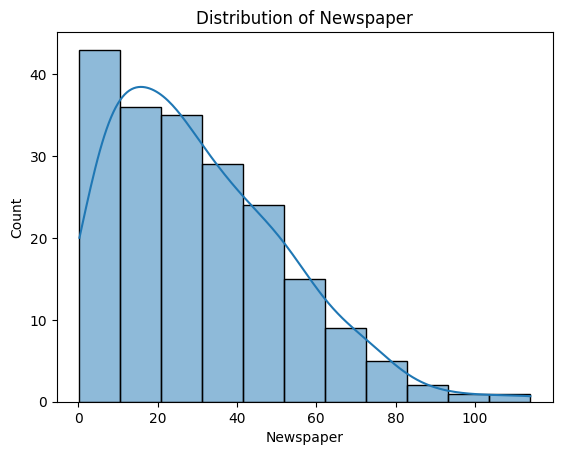

In [37]:
# Distribution of advertising features.
plt.figure(figsize=(8,8))
advertising_features=['TV','Radio','Newspaper']
for feature in advertising_features:
    sns.histplot(data=df,x=feature,kde='True')
    plt.title(f'Distribution of {feature}')
    plt.show()


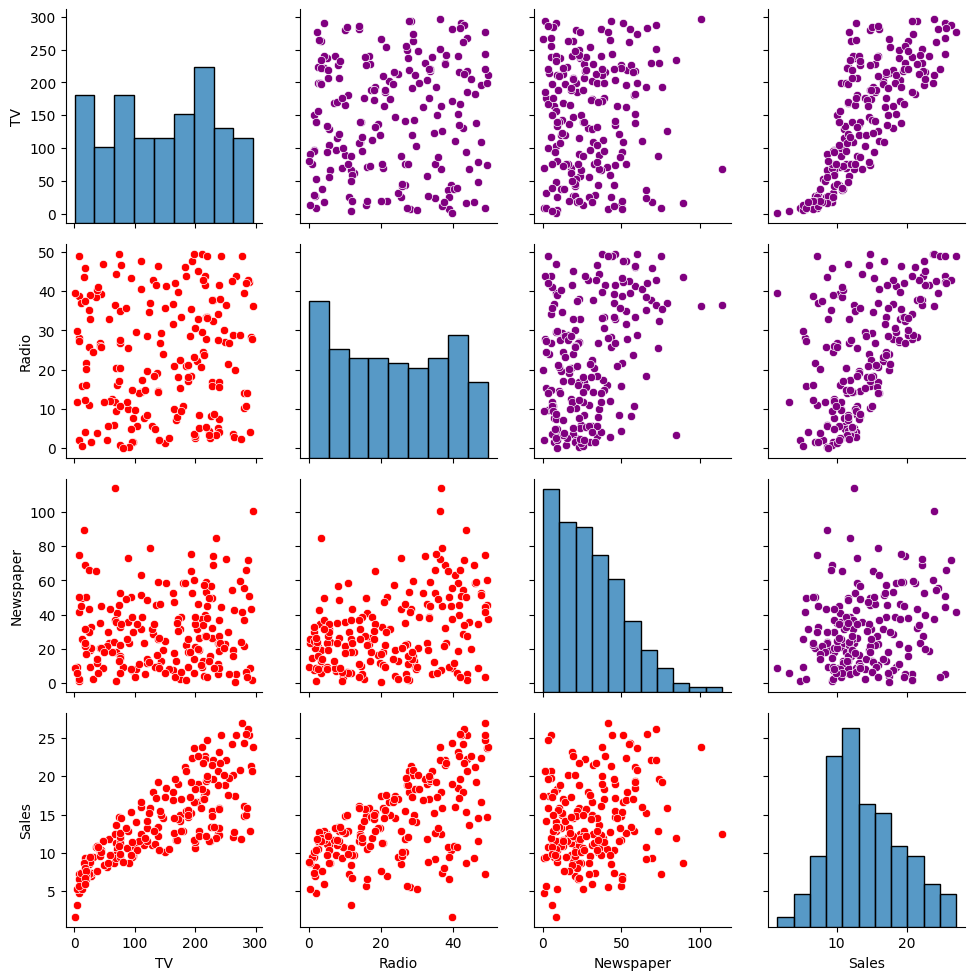

In [51]:
# Pairplot of advertising features vs target variable
g=sns.PairGrid(df)
g.map_upper(sns.scatterplot,color='purple')
g.map_lower(sns.scatterplot,color='red')
g.map_diag(sns.histplot)
plt.show()

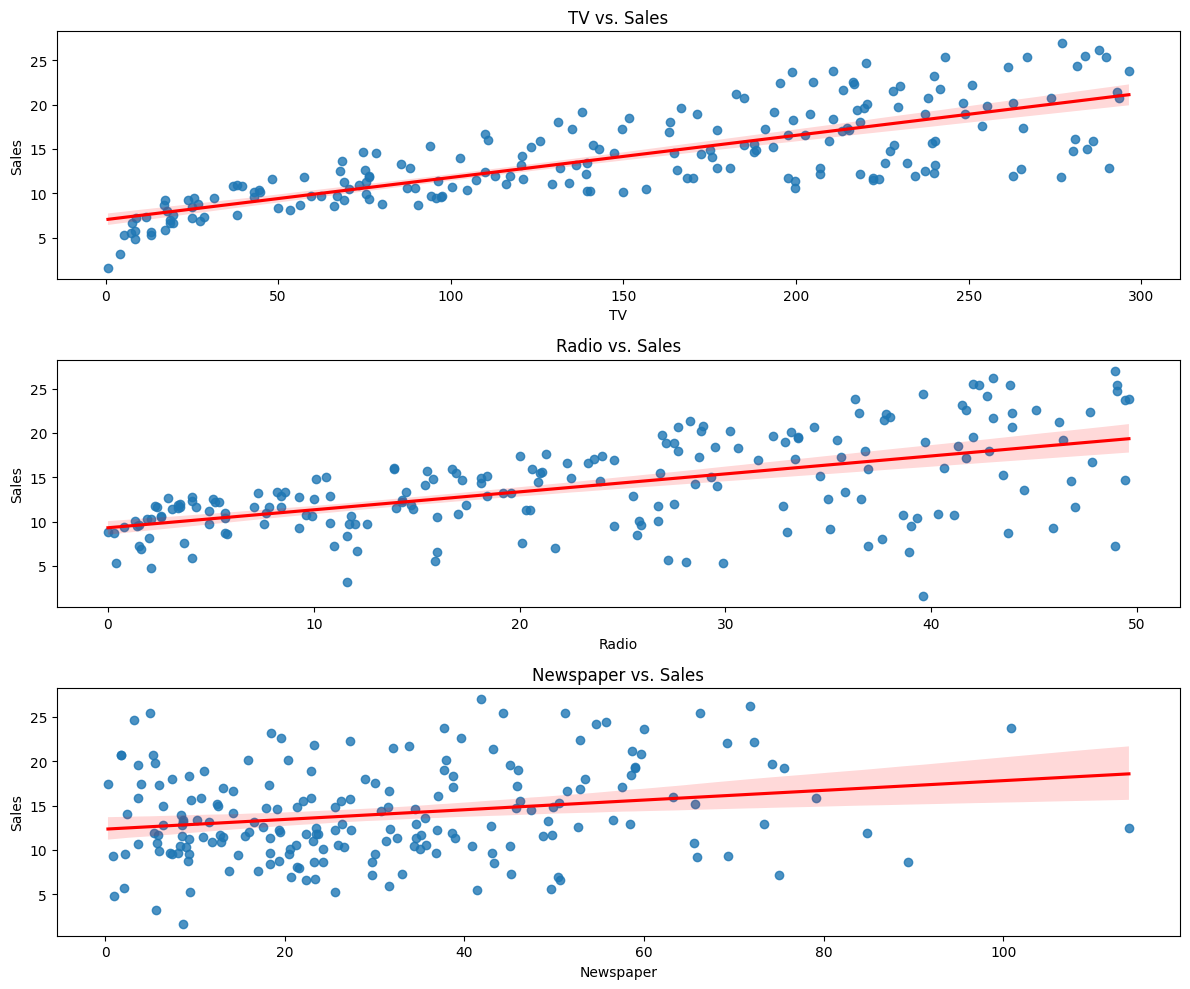

In [54]:
# Regression plot for advertising features vs target
plt.figure(figsize=(12, 10))
for i in advertising_features:
    plt.subplot(3, 1, advertising_features.index(i) + 1)
    sns.regplot(data=df, x=i, y='Sales',line_kws=dict(color="r"))
    plt.title(f'{i} vs. Sales')
plt.tight_layout()
plt.show()

In [55]:
#Correlation matrix
df.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.782224
Radio,0.054809,1.000000,0.354104,0.576223
Newspaper,0.056648,0.354104,1.000000,0.228299
Sales,0.782224,0.576223,0.228299,1.000000


Text(0.5, 1.0, 'Correlation Heatmap')

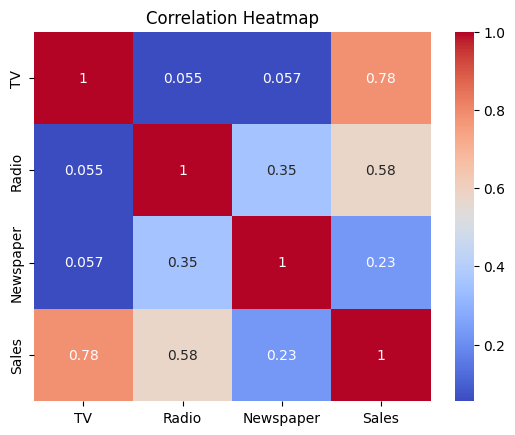

In [63]:
# Correlation heatmap plot using correlation matrix
sns.heatmap(data=df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')

## Modelling

In [64]:
# Splitting the dataset into advertising features and target variable.
x = df.drop("Sales", axis=1)
y = df["Sales"]

In [65]:
x.head()

,TV,Radio,Newspaper
1,230.1,37.8,69.2
2,44.5,39.3,45.1
3,17.2,45.9,69.3
4,151.5,41.3,58.5
5,180.8,10.8,58.4


In [66]:
y.head()

1    22.1
2    10.4
3     9.3
4    18.5
5    12.9
Name: Sales, dtype: float64

In [72]:
x.dtypes

TV           float64
Radio        float64
Newspaper    float64
dtype: object

In [73]:
y.dtypes

dtype('float64')

In [74]:
x.axes

[Index([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,
        ...
        191, 192, 193, 194, 195, 196, 197, 198, 199, 200],
       dtype='int64', length=200),
 Index(['TV', 'Radio', 'Newspaper'], dtype='object')]

In [75]:
y.axes

[Index([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,
        ...
        191, 192, 193, 194, 195, 196, 197, 198, 199, 200],
       dtype='int64', length=200)]

In [87]:
# Split data into train and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [90]:
# Initialize and fit the model1 - Linear Regression
model = LinearRegression()
model.fit(x_train, y_train)
print("Training score =",model.score(x_train,y_train))
print("Test score =",model.score(x_test,y_test))

Training score = 0.8957008271017817
Test score = 0.899438024100912


In [82]:
# Make predictions on the test set
y_pred = model.predict(x_test)

In [83]:
y_pred

array([16.4080242 , 20.88988209, 21.55384318, 10.60850256, 22.11237326,
       13.10559172, 21.05719192,  7.46101034, 13.60634581, 15.15506967,
        9.04831992,  6.65328312, 14.34554487,  8.90349333,  9.68959028,
       12.16494386,  8.73628397, 16.26507258, 10.27759582, 18.83109103,
       19.56036653, 13.25103464, 12.33620695, 21.30695132,  7.82740305,
        5.80957448, 20.75753231, 11.98138077,  9.18349576,  8.5066991 ,
       12.46646769, 10.00337695, 21.3876709 , 12.24966368, 18.26661538,
       20.13766267, 14.05514005, 20.85411186, 11.0174441 ,  4.56899622])

In [84]:
mse = mean_squared_error(y_test,y_pred)
mae = mean_absolute_error(y_test,y_pred)
r2 = r2_score(y_test,y_pred)
print(f'Mean Squared Error: {mse}')
print(f'Mean Absolute Error : {mae}')
print(f"R2-score : {r2}")

Mean Squared Error: 3.174097353976104
Mean Absolute Error : 1.4607567168117606
R2-score : 0.899438024100912


In [91]:
# Initialize and fit the model2 - RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
model.fit(x_train,y_train)
print("Training score =",model.score(x_train,y_train))
print("Test score =",model.score(x_test,y_test))

Training score = 0.9968709716130898
Test score = 0.9840074080601168


In [92]:
y_pred=model.predict(x_test)

In [93]:
y_pred

array([17.557, 21.71 , 20.925,  6.76 , 23.049, 13.263, 22.544,  9.545,
       11.825, 15.575,  7.694,  9.029, 12.107,  5.25 , 10.472, 12.539,
        6.588, 16.383, 11.524, 19.722, 20.076, 12.82 , 10.35 , 22.455,
        9.929,  8.863, 22.284, 12.678, 10.207,  5.477, 11.568, 10.99 ,
       22.093,  8.538, 15.434, 20.578, 12.132, 20.921, 12.209,  7.544])

In [94]:
mse = mean_squared_error(y_test,y_pred)
mae = mean_absolute_error(y_test,y_pred)
r2 = r2_score(y_test,y_pred)
print(f'Mean Squared Error: {mse}')
print(f'Mean Absolute Error : {mae}')
print(f"R2-score : {r2}")

Mean Squared Error: 0.5047836750000001
Mean Absolute Error : 0.5768749999999994
R2-score : 0.9840074080601168


### RandomForesetRegressor model performs better than Linear Regression model with 98% R2 score.